In [2]:
! pip install graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# For visualization
from sklearn import tree
import graphviz


In [3]:
# Load dataset
df = pd.read_csv("heart.csv")  # Assuming you've downloaded and extracted the CSV

# Quick look
print(df.head())
print(df.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [4]:
# Check for missing values
print(df.isnull().sum())

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


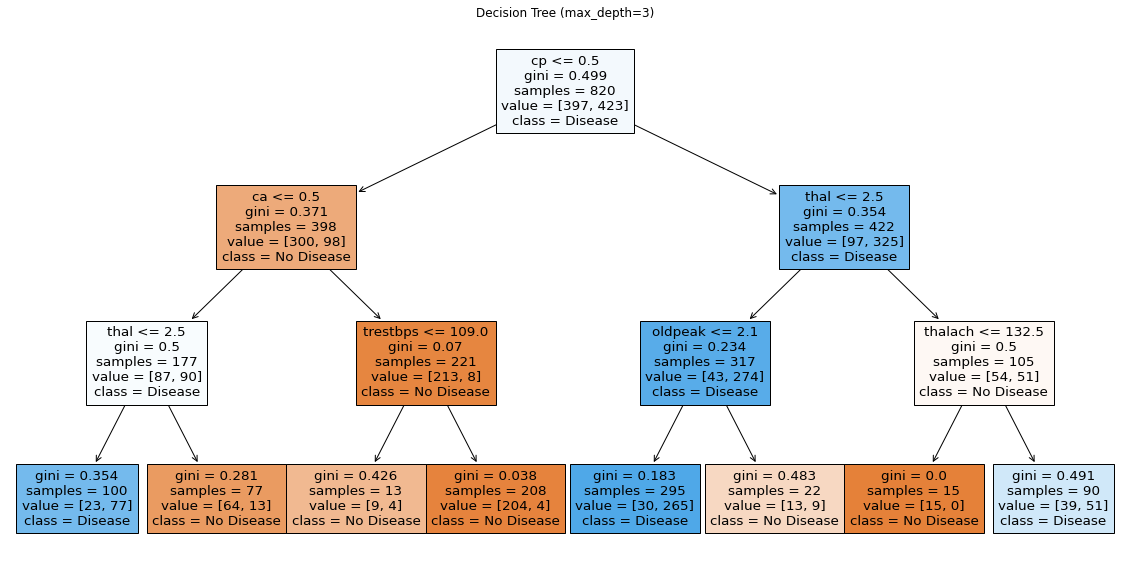

In [5]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Visualization using matplotlib
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()


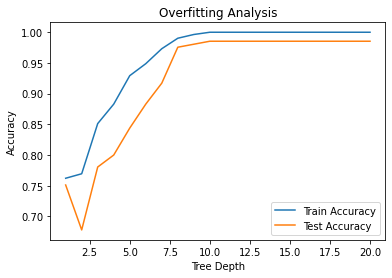

In [6]:
train_accuracies = []
test_accuracies = []

depths = range(1, 21)
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies.append(dt.score(X_train, y_train))
    test_accuracies.append(dt.score(X_test, y_test))

plt.plot(depths, train_accuracies, label="Train Accuracy")
plt.plot(depths, test_accuracies, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting Analysis")
plt.show()


In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Decision Tree Accuracy: 0.9853658536585366
Random Forest Accuracy: 0.9853658536585366


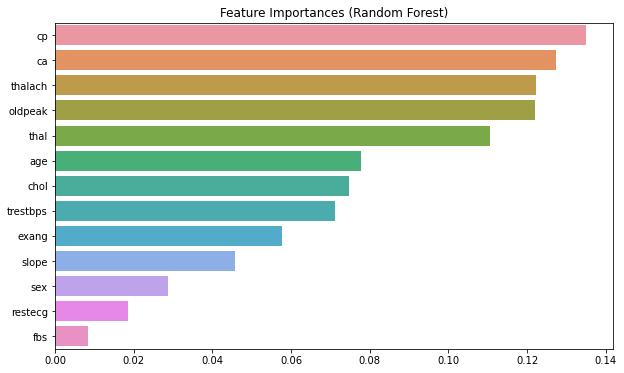

In [8]:
importances = rf.feature_importances_
feat_names = X.columns

# Sort
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feat_names[indices])
plt.title("Feature Importances (Random Forest)")
plt.show()


In [9]:
cv_scores_dt = cross_val_score(DecisionTreeClassifier(max_depth=3), X, y, cv=5)
cv_scores_rf = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=5)

print("Decision Tree CV Accuracy: {:.2f} ± {:.2f}".format(cv_scores_dt.mean(), cv_scores_dt.std()))
print("Random Forest CV Accuracy: {:.2f} ± {:.2f}".format(cv_scores_rf.mean(), cv_scores_rf.std()))


Decision Tree CV Accuracy: 0.83 ± 0.02
Random Forest CV Accuracy: 1.00 ± 0.01
